In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_seq_items', None)

In [3]:
conf_matrix = [[4963,5,5,3,3,3],
[11,4842,21,2,5,5],
[4,1,4999,2,6,13],
[3,5,25,4852,30,96],
[1,4,15,10,4873,124],
[2,4,18,18,84,4943]]

In [4]:
lang = ['deu', 'eng', 'fra', 'ita', 'por', 'spa']
conf_matrix_df = pd.DataFrame(conf_matrix,columns=lang,index=lang)
conf_matrix_df

,deu,eng,fra,ita,por,spa
deu,4963,5,5,3,3,3
eng,11,4842,21,2,5,5
fra,4,1,4999,2,6,13
ita,3,5,25,4852,30,96
por,1,4,15,10,4873,124
spa,2,4,18,18,84,4943


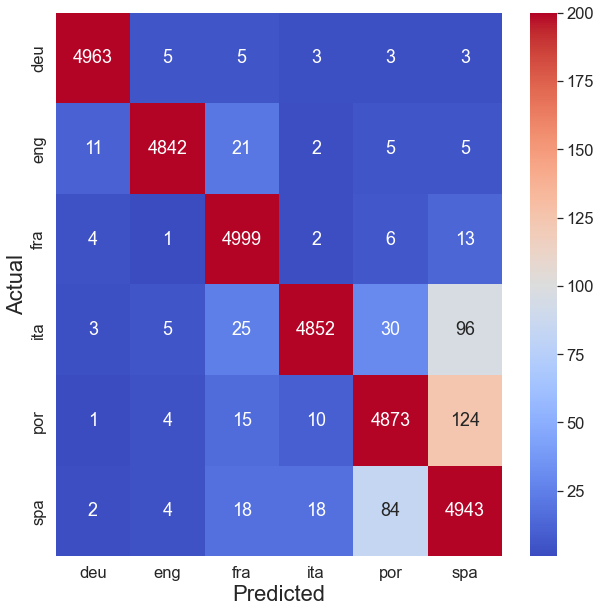

In [5]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix_df,
            cmap='coolwarm',
            annot=True,
            fmt='.5g',
            vmax=200)
plt.xlabel('Predicted',fontsize=22)
plt.ylabel('Actual',fontsize=22)
plt.show()

In [6]:
df = pd.read_csv('data/pollution_us_2000_2016.csv',index_col=0)
df.head(3)

,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Units,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19,46,Parts per million,0.0225,0.04,10,34,Parts per billion,3.000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19,46,Parts per million,0.0225,0.04,10,34,Parts per billion,3.000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19,46,Parts per million,0.0225,0.04,10,34,Parts per billion,2.975,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN


In [7]:
date = [datetime.strptime(dt, '%Y-%m-%d') for dt in df['Date Local']]
df.insert(8, 'Year', [dt.year for dt in date])
df.head(3)

,State Code,County Code,Site Num,Address,State,County,City,Date Local,Year,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Units,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,2000,Parts per billion,19.041667,49.0,19,46,Parts per million,0.0225,0.04,10,34,Parts per billion,3.000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,2000,Parts per billion,19.041667,49.0,19,46,Parts per million,0.0225,0.04,10,34,Parts per billion,3.000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,2000,Parts per billion,19.041667,49.0,19,46,Parts per million,0.0225,0.04,10,34,Parts per billion,2.975,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN


In [8]:
def aqiGroup(aqi):
    """Return level based on AQI values"""
    if  aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Moderate'
    elif aqi <= 150:
        return 'Unhealthy \n(Sensitive Groups)'
    elif aqi <= 200:
        return 'Unhealthy'
    elif aqi <= 300:
        return 'Very Unhealthy'
    elif aqi <= 500:
        return 'Hazardous'  

In [9]:
#Get maximum AQI across 4 pollution measures 
df['AQI'] = [np.nanmax(x) for x in df[['NO2 AQI', 'O3 AQI','SO2 AQI','CO AQI']].values.tolist()]
df.head(3)

,State Code,County Code,Site Num,Address,State,County,City,Date Local,Year,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Units,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,AQI
0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,2000,Parts per billion,19.041667,49.0,19,46,Parts per million,0.0225,0.04,10,34,Parts per billion,3.000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN,46.0
1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,2000,Parts per billion,19.041667,49.0,19,46,Parts per million,0.0225,0.04,10,34,Parts per billion,3.000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0,46.0
2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,2000,Parts per billion,19.041667,49.0,19,46,Parts per million,0.0225,0.04,10,34,Parts per billion,2.975,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN,46.0


In [10]:
#Get maximum AQI for each city each year
df_max = df.groupby(['City', 'Year'], as_index=False)['AQI'].max()
df_max.head(3)

,City,Year,AQI
0,Albuquerque,2011,90.0
1,Albuquerque,2012,100.0
2,Albuquerque,2013,112.0


In [11]:
#Get AQI group of maximum AQI value
df_max['AQI Group'] = [aqiGroup(aqi) for aqi in df_max['AQI']]
df_max.head(3)

,City,Year,AQI,AQI Group
0,Albuquerque,2011,90.0,Moderate
1,Albuquerque,2012,100.0,Moderate
2,Albuquerque,2013,112.0,Unhealthy \n(Sensitive Groups)


In [12]:
# AQI groups in 2016
AQI_2016 = df_max[df_max.Year==2016][['City','AQI Group']]
AQI_2016.columns = ['City','AQI 2016'] 
AQI_2016.head(3)

,City,AQI 2016
42,Arden-Arcade,Good
69,Baton Rouge,Moderate
85,Beltsville,Moderate


In [13]:
# AQI groups in 2010
AQI_2010 = df_max[df_max.Year==2010][['City','AQI Group']]
AQI_2010.columns = ['City','AQI 2010'] 
AQI_2010.head(3)

,City,AQI 2010
10,Alexandria,Unhealthy \n(Sensitive Groups)
36,Arden-Arcade,Unhealthy \n(Sensitive Groups)
63,Baton Rouge,Unhealthy \n(Sensitive Groups)


In [14]:
# Join tables and replace missing values
AQI = AQI_2016.join(AQI_2010.set_index(['City']),how='outer',on=['City'])
AQI.fillna('No Reading',inplace=True)
AQI.head(3)

,City,AQI 2016,AQI 2010
42.0,Arden-Arcade,Good,Unhealthy \n(Sensitive Groups)
69.0,Baton Rouge,Moderate,Unhealthy \n(Sensitive Groups)
85.0,Beltsville,Moderate,No Reading


In [15]:
#NOTE: 'Very Unhealthy' and 'Hazardous'  groups have been exluded
groups = ['Good','Moderate','Unhealthy \n(Sensitive Groups)',
          'Unhealthy','Not operational']

# Create matrix of group counts
hm_array = []
for i in groups:
    hm_array_i = []
    for j in groups:
        df =  AQI[(AQI['AQI 2010']==i)&(AQI['AQI 2016']==j)]
        hm_array_i.append(len(df))  
    hm_array.append(hm_array_i)

hm_array

[[5, 1, 0, 0, 0],
 [2, 8, 1, 0, 0],
 [4, 20, 0, 0, 0],
 [1, 2, 0, 0, 0],
 [0, 0, 0, 0, 0]]

In [16]:
# Create dataframe from matrix
hm_df = pd.DataFrame(hm_array,columns=groups,index=groups)
hm_df.head(3)

,Good,Moderate,Unhealthy (Sensitive Groups),Unhealthy,Not operational
Good,5,1,0,0,0
Moderate,2,8,1,0,0
Unhealthy \n(Sensitive Groups),4,20,0,0,0


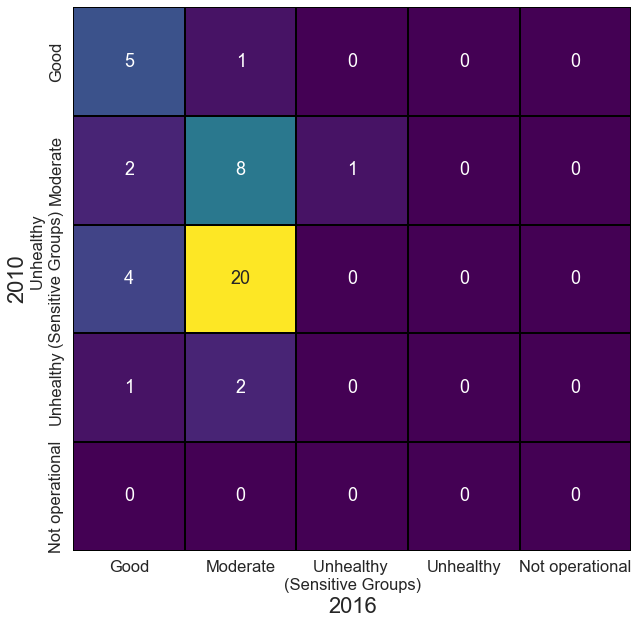

In [17]:
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(hm_df,
            cmap='viridis',
            annot=True,
            fmt='.5g',
            cbar=False,
            linewidths=2,
            linecolor='black')
plt.xlabel('2016',fontsize=22)
plt.ylabel('2010',fontsize=22)
plt.show()

In [18]:
df = pd.read_csv('data/monthly_csv.csv')
df.head(3)

,Source,Date,Mean
0,GCAG,2016-12-06,0.7895
1,GISTEMP,2016-12-06,0.8100
2,GCAG,2016-11-06,0.7504


In [19]:
#Only use GISTEMP record
df = df[df.Source == 'GISTEMP']
df.head(3)

,Source,Date,Mean
1,GISTEMP,2016-12-06,0.81
3,GISTEMP,2016-11-06,0.93
5,GISTEMP,2016-10-06,0.89


In [20]:
#Get year and month of record
date = [datetime.strptime(dt, '%Y-%m-%d') for dt in df['Date']]
df['year'] = [dt.year for dt in date]
df['month'] = [dt.month for dt in date]
df.head(3)

,Source,Date,Mean,year,month
1,GISTEMP,2016-12-06,0.81,2016,12
3,GISTEMP,2016-11-06,0.93,2016,11
5,GISTEMP,2016-10-06,0.89,2016,10


In [21]:
years = range(1900,2017)
months = range(1,13)

# Create matrix of temprature values
hm_array = []
for m in months:
    hm_array_y = []
    for y in years:
        mean =  df[(df.year == y) & (df.month == m)]['Mean'] 
        mean = mean.to_numpy()[0]
        hm_array_y.append(mean)  
    hm_array.append(hm_array_y)

In [22]:
hm_df = pd.DataFrame(hm_array, columns=years, index=months)
hm_df.head(3)

,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1,-0.40,-0.30,-0.19,-0.27,-0.64,-0.38,-0.31,-0.44,-0.46,-0.70,-0.44,-0.64,-0.27,-0.41,0.02,-0.20,-0.20,-0.46,-0.44,-0.21,-0.15,-0.04,-0.34,-0.27,-0.24,-0.34,0.20,-0.28,-0.04,-0.47,-0.29,-0.10,0.13,-0.34,-0.27,-0.37,-0.29,-0.11,0.00,-0.13,-0.15,0.13,0.26,-0.01,0.41,0.13,0.15,-0.13,0.05,0.09,-0.30,-0.35,0.16,0.09,-0.28,0.11,-0.17,-0.14,0.39,0.06,-0.01,0.07,0.08,-0.03,-0.06,-0.09,-0.16,-0.06,-0.23,-0.11,0.09,-0.02,-0.24,0.28,-0.14,0.07,0.00,0.18,0.08,0.14,0.30,0.56,0.09,0.52,0.30,0.21,0.30,0.36,0.57,0.16,0.41,0.42,0.45,0.37,0.30,0.50,0.27,0.33,0.61,0.48,0.26,0.44,0.75,0.73,0.59,0.72,0.57,0.96,0.24,0.62,0.73,0.51,0.46,0.68,0.73,0.81,1.17
2,-0.08,-0.05,-0.03,-0.06,-0.55,-0.59,-0.34,-0.53,-0.36,-0.47,-0.43,-0.60,-0.13,-0.44,-0.13,-0.01,-0.23,-0.53,-0.33,-0.19,-0.22,-0.21,-0.44,-0.37,-0.27,-0.35,0.07,-0.21,-0.12,-0.61,-0.24,-0.22,-0.18,-0.32,-0.04,0.11,-0.39,0.05,-0.04,-0.12,0.06,0.23,0.05,0.22,0.31,0.02,0.06,-0.08,-0.13,-0.16,-0.26,-0.44,0.12,0.16,-0.10,-0.21,-0.25,-0.05,0.24,0.09,0.14,0.18,0.14,0.19,-0.12,-0.17,0.00,-0.20,-0.15,-0.14,0.22,-0.20,-0.17,0.30,-0.28,0.07,-0.06,0.20,0.14,-0.09,0.42,0.41,0.14,0.40,0.17,-0.06,0.39,0.46,0.42,0.35,0.41,0.51,0.42,0.39,0.04,0.77,0.50,0.37,0.90,0.66,0.58,0.46,0.76,0.55,0.71,0.58,0.70,0.70,0.36,0.53,0.78,0.53,0.49,0.55,0.51,0.86,1.35
3,0.02,0.05,-0.29,-0.23,-0.46,-0.25,-0.15,-0.25,-0.58,-0.52,-0.47,-0.62,-0.37,-0.44,-0.23,-0.08,-0.31,-0.47,-0.21,-0.25,-0.08,-0.28,-0.13,-0.32,-0.12,-0.24,0.12,-0.39,-0.28,-0.34,-0.08,-0.06,-0.20,-0.29,-0.31,-0.13,-0.23,-0.17,0.05,-0.20,0.12,0.06,0.13,0.01,0.34,0.11,0.00,0.05,-0.23,-0.01,-0.06,-0.19,-0.10,0.11,-0.12,-0.36,-0.23,-0.05,0.10,0.19,-0.36,0.09,0.12,-0.13,-0.22,-0.11,0.04,0.03,0.21,0.00,0.08,-0.18,0.02,0.26,-0.05,0.14,-0.21,0.25,0.21,0.19,0.29,0.48,-0.01,0.42,0.29,0.17,0.29,0.17,0.49,0.36,0.76,0.36,0.47,0.36,0.26,0.45,0.34,0.52,0.63,0.34,0.60,0.58,0.91,0.57,0.64,0.69,0.63,0.70,0.73,0.53,0.92,0.64,0.58,0.66,0.77,0.90,1.30


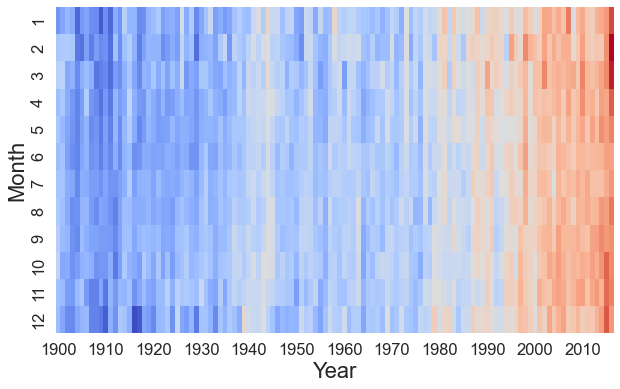

In [23]:
plt.figure(figsize=(10, 6), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)

sns.heatmap(hm_df,
            cmap='coolwarm',
            cbar=False,
            xticklabels=10)

plt.xlabel('Year', fontsize=22)
plt.ylabel('Month', fontsize=22)
plt.show()